In [ ]:
#Projeto COVID-19
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go 

In [ ]:
#importação de dados
url = '/content/drive/MyDrive/Nova pasta/covid_19_data_atual.csv'


In [ ]:
df = pd.read_csv(url, parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462


In [ ]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [ ]:
import re
def corrige_colunas(col_name):
  return re.sub(r"[/|]", "", col_name).lower()

In [ ]:
corrige_colunas("AdgE/P ou") #testando

'adgep ou'

In [ ]:
df.columns =[corrige_colunas(col) for col in df.columns]

In [ ]:
#Dados Covid-19 BRASIL
df.loc[df.country == 'Brazil']

,date,country,confirmed,recovered,deaths
19584,2020-01-22,Brazil,0,0,0
19585,2020-01-23,Brazil,0,0,0
19586,2020-01-24,Brazil,0,0,0
19587,2020-01-25,Brazil,0,0,0
19588,2020-01-26,Brazil,0,0,0
...,...,...,...,...,...
20395,2022-04-12,Brazil,30184286,0,661741
20396,2022-04-13,Brazil,30210934,0,661904
20397,2022-04-14,Brazil,30234024,0,662043
20398,2022-04-15,Brazil,30247302,0,662154


In [ ]:
brazil = df.loc[
    (df.country == 'Brazil') &
    (df.confirmed>0)
]

In [ ]:
#Casos Confirmados
px.line(brazil, 'date', 'confirmed', title='Casos confirmados de COVID-19 no Brasil')

In [ ]:
#novos casos por dia
brazil['novoscasos'] = list (map(
    lambda x: 0 if (x==0) else brazil['confirmed'].iloc[x] - brazil['confirmed'].iloc[x-1],
    np.arange(brazil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
brazil

,date,country,confirmed,recovered,deaths,novoscasos
19619,2020-02-26,Brazil,1,0,0,0
19620,2020-02-27,Brazil,1,0,0,0
19621,2020-02-28,Brazil,1,0,0,0
19622,2020-02-29,Brazil,2,0,0,1
19623,2020-03-01,Brazil,2,0,0,0
...,...,...,...,...,...,...
20395,2022-04-12,Brazil,30184286,0,661741,22377
20396,2022-04-13,Brazil,30210934,0,661904,26648
20397,2022-04-14,Brazil,30234024,0,662043,23090
20398,2022-04-15,Brazil,30247302,0,662154,13278


In [ ]:
px.line(brazil, x='date', y='novoscasos', title='Novos Casos por dia')

In [ ]:
# Mortes
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brazil.date, y=brazil.deaths, name = 'Mortes',
               mode = 'lines+markers', line = {'color': 'red'})
)

fig.update_layout(title= 'Mortes por COVID-19 no Brasil')

fig.show()

In [ ]:
# TAXA DE CRESCIMENTO
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Se data_inicio for None, define como a primeira data disponível no dataset
    if data_inicio == None:
        data_inicio = data.date.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.date.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # valores de presente e passado
    passado = data.loc[data.date == data_inicio, variable].values[0]
    presente = data.loc[data.date == data_fim, variable].values[0]
    
    # número de pontos no tempo
    n = (data_fim - data_inicio).days
    
    # Calcula a taxa
    taxa = (presente/passado)**(1/n) - 1

    return taxa*100                  

In [ ]:
# Taxa de crescimento médio no Brasil
taxa_crescimento(brazil, 'confirmed')

2.2328987175471493

In [ ]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.date.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.date.max()
    
    # Define o número de pontos no tempo que vai ser avaliado
    n = (data_fim - data_inicio).days
    
    #Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(taxas) * 100

In [ ]:
tx_dia = taxa_crescimento_diaria(brazil, 'confirmed')

In [ ]:
tx_dia

array([ 0.00000000e+00,  0.00000000e+00,  1.00000000e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+02,  0.00000000e+00,
        2.25000000e+02,  0.00000000e+00,  5.38461538e+01,  2.50000000e+01,
        2.40000000e+01,  2.25806452e+01,  3.68421053e+01,  1.90384615e+02,
        0.00000000e+00,  7.28476821e+00,  2.34567901e+01,  6.05000000e+01,
        1.58878505e+01,  6.69354839e+01,  2.76972625e+01,  2.87515763e+01,
        5.14201763e+01,  2.44501940e+01,  1.67879418e+01,  1.36626613e+01,
        1.68754894e+01,  1.44723618e+01,  1.42522681e+01,  9.01639344e+00,
        7.58928571e+00,  2.48525879e+01,  1.95732027e+01,  1.76711527e+01,
        1.25808056e+01,  1.43992933e+01,  7.43243243e+00,  9.26325247e+00,
        1.54016939e+01,  1.52201796e+01,  1.18862090e+01,  8.54521335e+00,
        5.54537122e+00,  7.06807546e+00,  5.57858688e+00,  7.81903542e+00,
        1.21051382e+01,  7.43290960e+00,  1.07050123e+01,  8.83557983e+00,
        5.44492335e+00,  

In [ ]:
primeiro_dia = brazil.date.loc[brazil.confirmed >0].min(0)

px.line(x=pd.date_range(primeiro_dia, brazil.date.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil')

In [ ]:
#predições
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
confirmados = brazil.confirmed
confirmados.index = brazil.date
confirmados

date
2020-02-26           1
2020-02-27           1
2020-02-28           1
2020-02-29           2
2020-03-01           2
                ...   
2022-04-12    30184286
2022-04-13    30210934
2022-04-14    30234024
2022-04-15    30247302
2022-04-16    30250077
Name: confirmed, Length: 781, dtype: int64

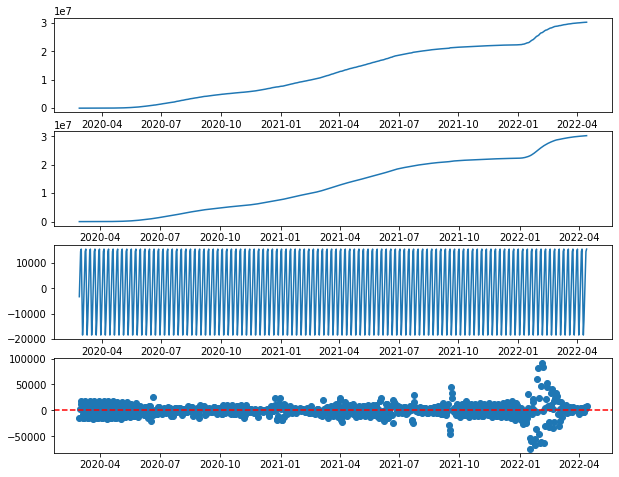

In [ ]:
res = seasonal_decompose(confirmados)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='red')
plt.show()

In [ ]:
# arima
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
modelo = auto_arima(confirmados)

In [ ]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-30', '2020-06-30'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()

In [ ]:
!pip install pystan==2.18.0.0
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50.0 MB 128 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6194110 sha256=6ebac671b2cc32a01cd13db58acb10e99fb571a2131681ee152a5cf80a344a79
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
from fbprophet import Prophet


In [ ]:
confirmados_recentes = confirmados.loc[confirmados.index >= '2021-05-01']

In [ ]:
train = confirmados_recentes.reset_index()[:-5]
test = confirmados_recentes.reset_index()[-5:]

train.rename(columns={"date":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","confirmed":"y"},inplace=True)


profeta = Prophet(growth="logistic", changepoints=['2021-05-01', '2021-04-30',
                                                   '2021-05-03', '2021-05-20'])

pop = 211463256
train['cap'] = pop

profeta.fit(train)

future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()